In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK/NFRR_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.374,0.0582,[2],0,0.330,70,0.0946,...,-1,0,0,(),Normal,Unk,Unk,1,Target,179616046
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,RYPAHLAR/3,0.157,0.0240,[2],0,0.334,26,0.0680,...,-1,0,0,(),Normal,Unk,Unk,1,Target,238770278
2,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.479,0.2050,[2],0,-0.002,83,0.0780,...,-1,0,0,(),Normal,Unk,Unk,1,Target,236712715
3,b1906_293T_proteinID_01A_QE3_122212.01909.01909.3,1,HGGYKPSDEHK/3,0.579,0.2600,[2],0,-0.003,20,0.1200,...,-1,0,0,(),Normal,Unk,Unk,1,Target,108607771
4,b1906_293T_proteinID_01A_QE3_122212.01910.01910.4,1,HGGYKPSDEHK/4,0.611,0.4800,[2],0,-0.002,4,0.2020,...,-1,0,0,(),Normal,Unk,Unk,1,Target,108608493


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK/NFRR_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,AEIHAC[160]K/2,0.223,0.090,[2],0,0.008,17,0.056,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,342050920
1,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,PRHNGFEGPALVK/4,0.162,0.070,[2],0,-0.002,4,0.085,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,583225390
2,b1906_293T_proteinID_01A_QE3_122212.01911.01911.3,1,AEDSNEQC[160]QVPHEDSSTEPEVK/3,0.082,0.039,[2],0,0.008,5,0.050,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,577924377
3,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,MTGPFDQGHK/2,0.283,0.001,[2],0,0.007,48,0.070,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,417240473
4,b1906_293T_proteinID_01A_QE3_122212.01926.01926.4,1,PMQHHGAVPGPRGR/4,0.136,0.054,[2],0,0.002,9,0.051,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,409739754


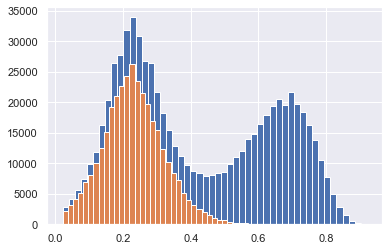

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.018000000000000006
0.015220000000000001


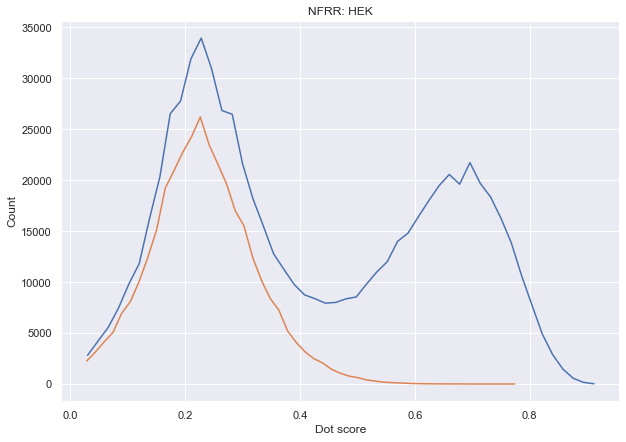

In [8]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('NFRR: HEK')
plt.plot(nnt1[1][:-1] + 0.009, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0075, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

695618
338238


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.47400000000000037
nnt:  289430
nnd:  2863
FDR:  0.009891856407421483
"""

score:  0.001
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.002
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.003
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.004
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.005
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.006
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.007
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.008
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.009000000000000001
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.010000000000000002
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.011000000000000003
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.012000000000000004
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.013000000000000005
nnt:  695618
nnd:  338238
FDR:  0.48624101158969435


score:  0.014000000000000005
nnt:  695618

nnt:  670412
nnd:  313687
FDR:  0.46790182753292003


score:  0.10400000000000008
nnt:  669868
nnd:  313149
FDR:  0.4674786674389581


score:  0.10500000000000008
nnt:  669285
nnd:  312621
FDR:  0.46709697662430805


score:  0.10600000000000008
nnt:  668710
nnd:  312072
FDR:  0.4666776330546874


score:  0.10700000000000008
nnt:  668127
nnd:  311500
FDR:  0.4662287259757501


score:  0.10800000000000008
nnt:  667506
nnd:  310967
FDR:  0.46586397725263895


score:  0.10900000000000008
nnt:  666949
nnd:  310373
FDR:  0.4653624190155469


score:  0.11000000000000008
nnt:  666374
nnd:  309801
FDR:  0.4649055935555709


score:  0.11100000000000008
nnt:  665766
nnd:  309202
FDR:  0.4644304455319136


score:  0.11200000000000009
nnt:  665181
nnd:  308639
FDR:  0.46399250730252367


score:  0.11300000000000009
nnt:  664594
nnd:  308052
FDR:  0.46351908082227644


score:  0.11400000000000009
nnt:  663949
nnd:  307393
FDR:  0.4629768250272235


score:  0.11500000000000009
nnt:  663321
nnd:  3068

nnt:  554265
nnd:  204772
FDR:  0.36944782730282444


score:  0.20600000000000016
nnt:  552468
nnd:  203152
FDR:  0.36771722525105527


score:  0.20700000000000016
nnt:  550733
nnd:  201536
FDR:  0.36594139083730226


score:  0.20800000000000016
nnt:  549011
nnd:  199967
FDR:  0.36423131776958934


score:  0.20900000000000016
nnt:  547216
nnd:  198247
FDR:  0.36228290108476363


score:  0.21000000000000016
nnt:  545504
nnd:  196654
FDR:  0.36049964803191176


score:  0.21100000000000016
nnt:  543722
nnd:  195080
FDR:  0.35878629152397734


score:  0.21200000000000016
nnt:  541906
nnd:  193456
FDR:  0.35699180300642547


score:  0.21300000000000016
nnt:  540147
nnd:  191829
FDR:  0.35514221128692747


score:  0.21400000000000016
nnt:  538402
nnd:  190261
FDR:  0.35338093097722517


score:  0.21500000000000016
nnt:  536594
nnd:  188667
FDR:  0.35160102423806455


score:  0.21600000000000016
nnt:  534848
nnd:  187076
FDR:  0.3497741414383152


score:  0.21700000000000016
nnt:  533041
nnd:

nnt:  393565
nnd:  63018
FDR:  0.16012094571417682


score:  0.3080000000000002
nnt:  392441
nnd:  62087
FDR:  0.15820722095805484


score:  0.3090000000000002
nnt:  391343
nnd:  61243
FDR:  0.1564944307167881


score:  0.3100000000000002
nnt:  390301
nnd:  60319
FDR:  0.1545448256601956


score:  0.3110000000000002
nnt:  389156
nnd:  59425
FDR:  0.1527022582203538


score:  0.3120000000000002
nnt:  388121
nnd:  58514
FDR:  0.15076226228418457


score:  0.3130000000000002
nnt:  387027
nnd:  57662
FDR:  0.14898702157730598


score:  0.3140000000000002
nnt:  385958
nnd:  56796
FDR:  0.1471559081558097


score:  0.3150000000000002
nnt:  384944
nnd:  55944
FDR:  0.14533022985161478


score:  0.3160000000000002
nnt:  383946
nnd:  55118
FDR:  0.1435566459866752


score:  0.3170000000000002
nnt:  382936
nnd:  54242
FDR:  0.14164769047569306


score:  0.3180000000000002
nnt:  381934
nnd:  53399
FDR:  0.13981211413490288


score:  0.31900000000000023
nnt:  380944
nnd:  52614
FDR:  0.13811478852

nnt:  318834
nnd:  11027
FDR:  0.034585395534980586


score:  0.4100000000000003
nnt:  318329
nnd:  10833
FDR:  0.03403082973904357


score:  0.4110000000000003
nnt:  317846
nnd:  10643
FDR:  0.033484769353712175


score:  0.4120000000000003
nnt:  317374
nnd:  10460
FDR:  0.032957961269669225


score:  0.4130000000000003
nnt:  316897
nnd:  10253
FDR:  0.03235436119622464


score:  0.4140000000000003
nnt:  316399
nnd:  10061
FDR:  0.031798457011558194


score:  0.4150000000000003
nnt:  315941
nnd:  9892
FDR:  0.03130964325617758


score:  0.4160000000000003
nnt:  315495
nnd:  9725
FDR:  0.03082457725162047


score:  0.4170000000000003
nnt:  315073
nnd:  9520
FDR:  0.030215219964897025


score:  0.4180000000000003
nnt:  314611
nnd:  9323
FDR:  0.02963342031906068


score:  0.4190000000000003
nnt:  314110
nnd:  9160
FDR:  0.029161758619591863


score:  0.4200000000000003
nnt:  313631
nnd:  9000
FDR:  0.02869614291954558


score:  0.4210000000000003
nnt:  313155
nnd:  8814
FDR:  0.02814580

'\n결과\nscore:  0.5000000000000003\nnnt:  276928\nnnd:  2745\nFDR:  0.00991232378091056\n'